In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
from qiskit.providers.basic_provider import BasicProvider # instead of BasicAer
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
import scipy as sci
import random
import matplotlib
import matplotlib.pyplot as plt
from itertools import permutations
S_simulator = Aer.backends(name='statevector_simulator')[0]

In [2]:
def Happiness( A ):
    happiness = 0
    for i in np.arange(len(A)):
        if( A[i] == 1):
            Mi = int(i)
        if( A[i] == 2):
            Be = int(i)
        if( A[i] == 3):
            Ma = int(i)
        if( A[i] == 4):
            Cu = int(i)
        if( A[i] == 5):
            Na = int(i)
        if( A[i] == 6):
            Cl = int(i)
        if( A[i] == 7):
            Wi = int(i)
    if( (abs(Mi - Be)<=3) and (abs(Mi - Ma)<=3) ): # Michelle
        happiness += 1
    if( (abs(Be - Mi)<=3) and (abs(Be - Ma)<=3) ): # Betty
        happiness += 1
    if( (abs(Ma - Mi)<=3) and (abs(Ma - Be)<=3) ): # Margaret
        happiness += 1
    if( abs(Cu - Na)>=3 ): # Cullen
        happiness += 1
    if( (abs(Na - Cu)>=3) and (abs(Na - Be)==1) ): # Nate
        happiness += 1
    if( (abs(Cl - Cu)>1) and (abs(Cl - Wi)>1) ): # Clint
        happiness += 1
    happiness += 1 # Will
    return happiness
#==================================================================================
perm = permutations([1, 2, 3, 4, 5, 6, 7])
All_Happy = []
all_perm = 0
for i in list(perm):
    all_perm = all_perm + 1
    if( Happiness(list(i)) == 7 ):
        All_Happy.append( list(i) )
print('Total Combinations Where Everyone Is Happy: ',len(All_Happy))

Total Combinations Where Everyone Is Happy:  72


In [3]:
q = QuantumRegister(2, name = 'q')
a = QuantumRegister(1, name = 'a')
qc= QuantumCircuit(q,a, name = 'qc')
#===================================
qc.h( q[0] )
qc.h( q[1] )
qc.barrier()
print('__ Initial State __')
oq.Wavefunction(qc, systems=[2,1])
#----------------------------------- Uc Operator
qc.x( q[0] )
qc.ccx( q[0], q[1], a[0] )
qc.cp( -m.pi/2, a[0], q[0] )
qc.ccx( q[0], q[1], a[0] )
qc.x( q[0] )
#-----------------------------------
print('\n__ After Applying The |01> Phase Term __')
oq.Wavefunction(qc, systems=[2,1], show_systems=[True,False])
print('\n__ Circuit Diagram __\n')
print(qc)

__ Initial State __
0.5  |00>|0>   0.5  |10>|0>   0.5  |01>|0>   0.5  |11>|0>   

__ After Applying The |01> Phase Term __
0.5  |00>   0.5  |10>   -0.5j |01>   0.5  |11>   

__ Circuit Diagram __

     ┌───┐ ░ ┌───┐                    ┌───┐
q_0: ┤ H ├─░─┤ X ├──■───■──────────■──┤ X ├
     ├───┤ ░ └───┘  │   │          │  └───┘
q_1: ┤ H ├─░────────■───┼──────────■───────
     └───┘ ░      ┌─┴─┐ │P(-π/2) ┌─┴─┐     
  a: ──────░──────┤ X ├─■────────┤ X ├─────
           ░      └───┘          └───┘     


In [4]:
q = QuantumRegister(2, name = 'q')
a = QuantumRegister(1, name = 'a')
Uc_qc= QuantumCircuit(q,a, name = 'qc')
Uc_qc.h( q[0] )
Uc_qc.h( q[1] )
print('__ Initial State __')
oq.Wavefunction(Uc_qc, systems=[2,1])
#-------------------------------------- # |00> state
Uc_qc.x( q[0] )
Uc_qc.x( q[1] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cp( m.pi/4, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[1] )
Uc_qc.x( q[0] )
#-------------------------------------- # |01> state
Uc_qc.x( q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cp( -m.pi/2, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[0] )
#-------------------------------------- # |10> state
Uc_qc.x( q[1] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cp( -m.pi/4, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[1] )
#-------------------------------------- # |11> state
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cp( m.pi/2, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
print('\n__ After Applying U(C,gamma) __')
oq.Wavefunction(Uc_qc, systems=[2,1]);

__ Initial State __
0.5  |00>|0>   0.5  |10>|0>   0.5  |01>|0>   0.5  |11>|0>   

__ After Applying U(C,gamma) __
0.35355+0.35355j |00>|0>   0.35355-0.35355j |10>|0>   -0.5j |01>|0>   0.5j |11>|0>   


In [5]:
q = QuantumRegister(3,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')
#=================================
qc.h( q[0] )
qc.h( q[1] )
qc.h( q[2] )
qc.p( m.pi/10, q[0] )
qc.p( m.pi/15, q[1] )
qc.p( m.pi/20, q[2] )
qc.rx( m.pi/5, q[0] )
qc.ry( m.pi/6, q[1])
qc.rz( m.pi/7, q[2])
#----------------------
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
qc.measure(q,c)
M = oq.Measurement( qc, shots=10000, return_M=True, print_M=False)
#-----------------------------------------------------------------
Energies = [ ['000',2],['100',-4],['010',-2],['110',4],['001',4],['101',-2],['011',-4],['111',2]]
EV1 = 0
EV2 = 0
for i in range( len(Energies) ):
    EV1 = EV1 + M[ Energies[i][0] ] * Energies[i][1]/10000
    EV2 = EV2 + np.real(SV[i]*np.conj(SV[i])) * Energies[i][1]
print('Energy Expectation Value From Measurements: ',round(EV1,4))
print('\nEnergy Expectation Value From Wavefunction: ',round(EV2,4))

Energy Expectation Value From Measurements:  -0.2624

Energy Expectation Value From Wavefunction:  -0.2665


In [6]:
q = QuantumRegister(2,name='q')
qc = QuantumCircuit(q,name='qc')
#===============================
qc.h( q[0] )
qc.h( q[1] )
qc.barrier()
print('___ Initial State ___')
oq.Wavefunction( qc )
#-------------------------------
qc.cx( q[0], q[1] )
qc.p( -m.pi/2, q[1] )
qc.cx( q[0], q[1] )
#-------------------------------
print('\n___ After e^{ZZ} ___')
oq.Wavefunction( qc )
print( qc )

___ Initial State ___
0.5  |00>   0.5  |10>   0.5  |01>   0.5  |11>   

___ After e^{ZZ} ___
0.5  |00>   -0.5j |10>   -0.5j |01>   0.5  |11>   
     ┌───┐ ░                      
q_0: ┤ H ├─░───■───────────────■──
     ├───┤ ░ ┌─┴─┐┌─────────┐┌─┴─┐
q_1: ┤ H ├─░─┤ X ├┤ P(-π/2) ├┤ X ├
     └───┘ ░ └───┘└─────────┘└───┘


In [7]:
gamma = 0.8
beta = 1.6
B = [-2.5,3.25,2.25]
#====================================
q = QuantumRegister(3,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')
#------------------------------------
for i in np.arange(3):
    qc.h( q[int(i)] )
#---------------------- # Z1Z2
qc.cx( q[0], q[1] )
qc.p( 2*gamma, q[1] )
qc.cx( q[0], q[1] )
#---------------------- # Z1Z3
qc.cx( q[0], q[2] )
qc.p( 2*gamma, q[2] )
qc.cx( q[0], q[2] )
#---------------------- # Z2Z3
qc.cx( q[1], q[2] )
qc.p( 2*gamma, q[2] )
qc.cx( q[1], q[2] )
#---------------------- # Z_gamma gates
for j in np.arange(3):
    qc.p( gamma*B[j], q )
#---------------------- # X_beta gates
for k in np.arange(3):
    qc.rx( beta, q )
#------------------------------------
qc.measure( q,c )
oq.Measurement( qc, shots = 1 )

1|111>   


In [8]:
trials = 10000
M = oq.Measurement(qc, shots = trials, return_M=True)

3621|111>   939|100>   2856|000>   973|001>   896|010>   221|011>   234|101>   260|110>   


In [9]:
K = list(M.keys())
Cz = { '000':-5.0, '001':1.5, '010':5.5, '011':8.0, '100':-6.0, '101':-3.5, '110':0.5, '111':-1.0 }
#----------------------------
F = 0
for k in np.arange( len(K) ):
    F = F + (M[K[k]]*Cz[K[k]])/trials
print('\u03B3 = ',gamma,' \u03B2 = ',beta,' Expectation Value: ',round(F,3))

γ =  0.8  β =  1.6  Expectation Value:  -1.607


Optimal Energy Expectation Value:  -5.3967  γ =  6.2204  β =  1.5708 



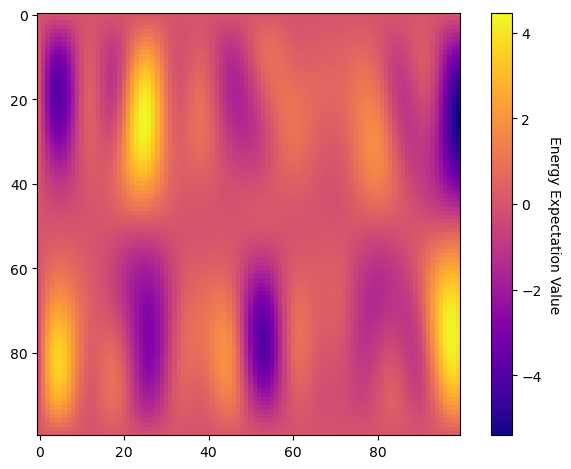

In [10]:
size = 100
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1],[0,2],[1,2] ]
#-------------------------------------------------------
Energies,States = oq.Ising_Energy( Vert,Edge )
EV_grid = np.zeros(shape=(size,size))
EV_min = 10000
#========================================================
for b in np.arange(size):
    beta = round(2*m.pi*(b/size),4)
    for g in np.arange(size):
        gamma = round(2*m.pi*(g/size),4)
        q = QuantumRegister(len(Vert))
        qc= QuantumCircuit(q)
        for hh in np.arange(len(Vert)):
            qc.h( q[int(hh)] )
        oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma )
        EV = oq.E_Expectation_Value( qc, Energies )
        EV_grid[b,g] = EV
        if( EV < EV_min ):
            Params = [beta,gamma]
            EV_min = EV
print('Optimal Energy Expectation Value: ',EV_min,' \u03B3 = ',Params[1],' \u03B2 = ',Params[0],'\n')
#========================================================
fig, ax = plt.subplots()
show_text = False
show_ticks = False
oq.Heatmap(EV_grid, show_text, show_ticks, ax, "plasma", "Energy Expectation Value")
fig.tight_layout()
plt.show()

In [11]:
beta = Params[0] # Params is required from the previous cell of code
gamma = Params[1]
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1],[0,2],[1,2] ]
Energies,States = oq.Ising_Energy( Vert,Edge )
#=======================================================
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma )
#========================================================
print('Optimal Energy Expectation Value: ',EV_min,' \u03B3 = ',Params[1],' \u03B2 = ',Params[0],'\n')
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,8)

Optimal Energy Expectation Value:  -5.3967  γ =  6.2204  β =  1.5708 

State  100  Probability:  56.52 %  Energy:  -6.0
State  000  Probability:  41.14 %  Energy:  -5.0
State  110  Probability:  0.73 %  Energy:  0.5
State  010  Probability:  0.68 %  Energy:  5.5
State  101  Probability:  0.27 %  Energy:  -3.5
State  001  Probability:  0.26 %  Energy:  1.5
State  011  Probability:  0.22 %  Energy:  8.0
State  111  Probability:  0.18 %  Energy:  -1.0


In [12]:
T = 8
Z = [m.sqrt(0.5),0,0,m.sqrt(0.5)]
Closest_IP = 0
#====================================
for i1 in np.arange(T+1):
    t1 = i1*m.pi/T
    for i2 in np.arange(T+1):
        t2 = i2*m.pi/T
        for i3 in np.arange(T+1):
            t3 = i3*m.pi/T
            for i4 in np.arange(T+1):
                t4 = i4*m.pi/T
#---------------------
                q = QuantumRegister(2)
                qc= QuantumCircuit(q)
                qc.rx( t1, q[0] )
                qc.rx( t2, q[1] )
                qc.ry( t3, q[0] )
                qc.ry( t4, q[1] )
                SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
                IP = (SV[0]*Z[0]) + (SV[1]*Z[1]) + (SV[2]*Z[2]) + (SV[3]*Z[3])
                if( IP > Closest_IP ):
                    Closest_IP = IP

print( 'Largest Inner Product Overlap with the |00> + |11> state: ',round(np.real(Closest_IP),4 ))

Largest Inner Product Overlap with the |00> + |11> state:  0.7071


In [13]:
T = 8
Z = [m.sqrt(0.5),0,0,m.sqrt(0.5)]
Closest_IP = 0
#====================================
for i1 in np.arange(T+1):
    t1 = i1*m.pi/T
    for i2 in np.arange(T+1):
        t2 = i2*m.pi/T
        for i3 in np.arange(T+1):
            t3 = i3*m.pi/T
            for i4 in np.arange(T+1):
                t4 = i4*m.pi/T
#---------------------
                q = QuantumRegister(2)
                qc= QuantumCircuit(q)
                qc.rx( t1, q[0] )
                qc.rx( t2, q[1] )
                qc.ry( t3, q[0] )
                qc.ry( t4, q[1] )
                qc.cx( q[0], q[1] )
                SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
                IP = (SV[0]*Z[0]) + (SV[1]*Z[1]) + (SV[2]*Z[2]) + (SV[3]*Z[3])
                if( IP > Closest_IP ):
                    Closest_IP = IP

print( 'Largest Inner Product Overlap with |\u03A8>: ',round(np.real(Closest_IP),4 ))

Largest Inner Product Overlap with |Ψ>:  1.0


Optimal Energy Expectation Value:  -4.6185  γ =  1.3823  β =  1.6336 



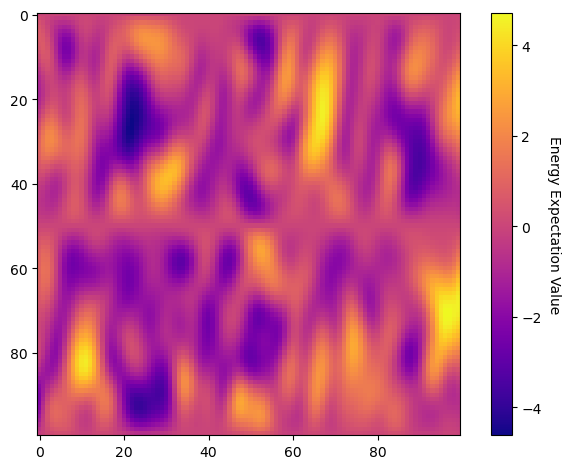

State  100  Probability:  46.13 %  Energy:  -6.0
State  000  Probability:  42.05 %  Energy:  -5.0
State  011  Probability:  2.51 %  Energy:  8.0
State  101  Probability:  2.31 %  Energy:  -3.5
State  010  Probability:  2.2 %  Energy:  5.5
State  111  Probability:  2.16 %  Energy:  -1.0
State  001  Probability:  1.93 %  Energy:  1.5
State  110  Probability:  0.71 %  Energy:  0.5


In [15]:
size = 100
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1],[0,2],[1,2] ]
#-------------------------------------------------------
Energies,States = oq.Ising_Energy( Vert,Edge )
EV_grid = np.zeros(shape=(size,size))
EV_min = 10000
#========================================================
for b in np.arange(size):
    beta = round(2*m.pi*(b/size),4)
    for g in np.arange(size):
        gamma = round(2*m.pi*(g/size),4)
        q = QuantumRegister(len(Vert))
        qc= QuantumCircuit(q)
        for hh in np.arange(len(Vert)):
            qc.h( q[int(hh)] )
        oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Mixing=2, p = 2)
        EV = oq.E_Expectation_Value( qc, Energies )
        EV_grid[b,g] = EV
        if( EV < EV_min ):
            Params = [beta,gamma]
            EV_min = EV
print('Optimal Energy Expectation Value: ',EV_min,' \u03B3 = ',Params[1],' \u03B2 = ',Params[0],'\n')
#========================================================
fig, ax = plt.subplots()
show_text = False
show_ticks = False
oq.Heatmap(EV_grid, show_text, show_ticks, ax, "plasma", "Energy Expectation Value")
fig.tight_layout()
plt.show()
#========================================================
beta = Params[0]
gamma = Params[1]
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Mixing=2,p=2 )
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,8)

Optimal Energy Expectation Value:  -5.2371  γ =  4.7752  β =  0.5655 



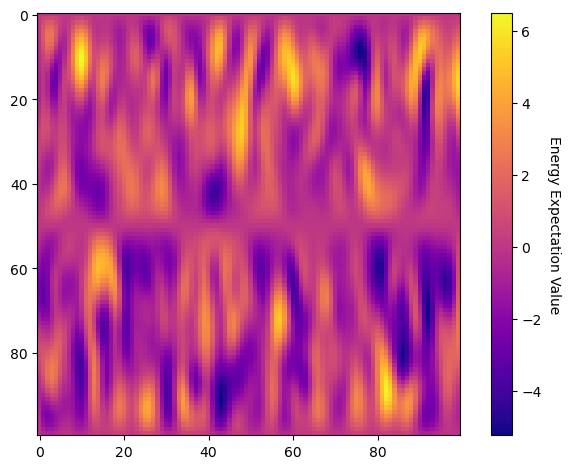

State  100  Probability:  50.15 %  Energy:  -9.5
State  001  Probability:  25.03 %  Energy:  -3.0
State  111  Probability:  11.85 %  Energy:  1.5
State  000  Probability:  5.19 %  Energy:  -2.5
State  110  Probability:  4.12 %  Energy:  -4.0
State  010  Probability:  3.55 %  Energy:  11.0
State  011  Probability:  0.08 %  Energy:  4.5
State  101  Probability:  0.03 %  Energy:  2.0


In [16]:
size = 100
#-------------------------------------------------------
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1,2],[1,2,1.5],[2,0,-3] ]
#-------------------------------------------------------
Energies,States = oq.Ising_Energy( Vert,Edge,Transverse=True )
EV_grid = np.zeros(shape=(size,size))
EV_min = 10000
#========================================================
for b in np.arange(size):
    beta = round(2*m.pi*(b/size),4)
    for g in np.arange(size):
        gamma = round(2*m.pi*(g/size),4)
        q = QuantumRegister(len(Vert))
        qc= QuantumCircuit(q)
        for hh in np.arange(len(Vert)):
            qc.h( q[int(hh)] )
        oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma , Transverse=True, Mixing=2, p = 2 )
        EV = oq.E_Expectation_Value( qc, Energies )
        EV_grid[b,g] = EV
        if( EV < EV_min ):
            Params = [beta,gamma]
            EV_min = EV
print('Optimal Energy Expectation Value: ',EV_min,' \u03B3 = ',Params[1],' \u03B2 = ',Params[0],'\n')
#========================================================
fig, ax = plt.subplots()
show_text = False
show_ticks = False
oq.Heatmap(EV_grid, show_text, show_ticks, ax, "plasma", "Energy Expectation Value")
fig.tight_layout()
plt.show()
#========================================================
beta = Params[0]
gamma = Params[1]
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Transverse=True, Mixing=2,p=2 )
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,8)

In [17]:
def Ising_Gradient_Descent(qc, q, Circ, V, E, beta, gamma, epsilon, En, step, **kwargs):
    '''
    Input: qc (QuantumCircuit) q (QuantumRegister) Circ (Ising_Circuit function) V (array) E
    beta (float) gamma (float) epsilon (float) En (array) step (float)
    Keyword Arguments: Transverse (Bool) - Changes to the Transve
    Mixing (integer) - Denotes which mixing circuit to use for U(B,beta)
    Calculates and returns the next values for beta and gamma using gradient descent
    '''
    Trans = False
    if 'Transverse' in kwargs:
        if( kwargs['Transverse'] == True ):
            Trans = True
    Mixer = 1
    if 'Mixing' in kwargs:
        Mixer = int(kwargs['Mixing'])
    params = [ [beta+epsilon,gamma],[beta-epsilon,gamma],[beta,gamma+epsilon],[beta,gamma-epsilon] ]
    ev = []
    for i in np.arange( 4 ):
        q = QuantumRegister(len(V))
        qc= QuantumCircuit(q)
        for hh in np.arange(len(V)):
            qc.h( q[int(hh)] )
        Circ( qc, q, V, E, params[i][0], params[i][1], Transverse=Trans, Mixing=Mixer )
        ev.append( E_Expectation_Value( qc, En ) )
    beta_next = beta - ( ev[0] - ev[1] )/( 2.0*epsilon ) * step
    gamma_next = gamma - ( ev[2] - ev[3] )/( 2.0*epsilon ) * step
    return beta_next, gamma_next

In [18]:
epsilon = 0.001
step_size = 0.001
delta = 0.0001
#-------------------------------------------------------
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1,2],[1,2,1.5],[2,0,-3] ]
#-------------------------------------------------------
Energies,States = oq.Ising_Energy( Vert,Edge, Transverse=True )
EV = 100
EV_old = 1000
EV_min = 1000
#========================================================
beta = 0.5
gamma = 4.5
s = 0
while( (abs( EV - EV_old ) > delta)):
    q = QuantumRegister(len(Vert))
    qc= QuantumCircuit(q)
    for hh in np.arange(len(Vert)):
        qc.h( q[int(hh)] )
    if( s != 0 ):
        beta,gamma = oq.Ising_Gradient_Descent(qc,q,oq.Ising_Circuit,Vert,Edge,beta,gamma,epsilon,Energies,step_size,Transverse=True,Mixing=1)
    oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Transverse=True, Mixing=2 )
    EV_old = EV
    EV = oq.E_Expectation_Value( qc, Energies )
    if( EV < EV_min ):
        Params = [beta,gamma]
        EV_min = EV
    s = int(s+1)
    if (s % 10 == 0):
        print('F(\u03B3,\u03B2): ',EV,' \u03B3 = ',round(gamma,6),' \u03B2 = ',round(beta,6),)

F(γ,β):  -1.2035  γ =  4.5151  β =  0.5274
F(γ,β):  -1.41  γ =  4.52285  β =  0.5578
F(γ,β):  -1.5492  γ =  4.5266  β =  0.5877
F(γ,β):  -1.6591  γ =  4.52895  β =  0.61695
F(γ,β):  -1.7538  γ =  4.53085  β =  0.64545
F(γ,β):  -1.8402  γ =  4.53275  β =  0.6731
F(γ,β):  -1.9169  γ =  4.5346  β =  0.6999
F(γ,β):  -1.9811  γ =  4.53625  β =  0.726
F(γ,β):  -2.0369  γ =  4.53795  β =  0.7513
F(γ,β):  -2.0842  γ =  4.5397  β =  0.7759
F(γ,β):  -2.1214  γ =  4.5414  β =  0.7996
F(γ,β):  -2.1481  γ =  4.543  β =  0.8227
F(γ,β):  -2.1668  γ =  4.54465  β =  0.84495
F(γ,β):  -2.1783  γ =  4.5464  β =  0.8667


In [19]:
Energies

[-2.5, -9.5, 11.0, -4.0, -3.0, 2.0, 4.5, 1.5]

In [20]:
States

['000', '100', '010', '110', '001', '101', '011', '111']

In [22]:
epsilon = 0.0001
step_size = 0.001
delta = 0.0001
#-------------------------------------------------------
Vert = [ [0,-2.5] , [1,3.25] , [2,1.25] ]
Edge = [ [0,1,2],[1,2,1.5],[2,0,-3] ]
#-------------------------------------------------------
Energies,States = oq.Ising_Energy( Vert,Edge, Transverse=True )
EV = 100
EV_old = 1000
EV_min = 1000
#========================================================
mixing = 2
pp = 1
beta = 2*m.pi*random.random()
gamma = 2*m.pi*random.random()
s = 0
while( (abs( EV - EV_old ) > delta) and ( EV < EV_old ) ):
    q = QuantumRegister(len(Vert))
    qc= QuantumCircuit(q)
    for hh in np.arange(len(Vert)):
        qc.h( q[int(hh)] )
    if( s != 0 ):
        beta,gamma = oq.Ising_Gradient_Descent(qc,q,oq.Ising_Circuit,Vert,Edge,beta,gamma,epsilon,Energies,step_size,Transverse=True,Mixing=mixing,p=pp)
    oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Transverse=True, Mixing=2 )
    EV_old = EV
    EV = oq.E_Expectation_Value( qc, Energies )
    if( EV < EV_min ):
        Params = [beta,gamma]
        EV_min = EV
    s = int(s+1)
    print('F(\u03B3,\u03B2): ',EV,' \u03B3 = ',round(gamma,6),' \u03B2 = ',round(beta,6),)
#========================================================
print('\n-----------------------------------------------------------\n')
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
oq.Ising_Circuit( qc, q, Vert, Edge, beta, gamma, Transverse=True, Mixing=mixing,p=pp)
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,8)

F(γ,β):  1.611  γ =  6.043438  β =  4.157978
F(γ,β):  1.5789  γ =  6.048438  β =  4.154978
F(γ,β):  1.547  γ =  6.053438  β =  4.152478
F(γ,β):  1.5141  γ =  6.058438  β =  4.149978
F(γ,β):  1.4776  γ =  6.063938  β =  4.147478
F(γ,β):  1.44  γ =  6.069438  β =  4.144978
F(γ,β):  1.3994  γ =  6.075438  β =  4.142978
F(γ,β):  1.3577  γ =  6.081438  β =  4.140978
F(γ,β):  1.315  γ =  6.087438  β =  4.138978
F(γ,β):  1.2681  γ =  6.093938  β =  4.136978
F(γ,β):  1.2168  γ =  6.100938  β =  4.134978
F(γ,β):  1.1652  γ =  6.107938  β =  4.133478
F(γ,β):  1.1134  γ =  6.114938  β =  4.132478
F(γ,β):  1.0564  γ =  6.122438  β =  4.130978
F(γ,β):  0.9992  γ =  6.129938  β =  4.129978
F(γ,β):  0.9409  γ =  6.137438  β =  4.128478
F(γ,β):  0.8826  γ =  6.144938  β =  4.127478
F(γ,β):  0.82  γ =  6.152938  β =  4.126478
F(γ,β):  0.7569  γ =  6.160938  β =  4.125478
F(γ,β):  0.6935  γ =  6.168938  β =  4.124478
F(γ,β):  0.6297  γ =  6.176938  β =  4.123478
F(γ,β):  0.5655  γ =  6.184938  β =  4.12

In [23]:
p = 2
epsilon = 0.001
step_size = 0.01
delta = 0.001
#-------------------------------------------------------
Vert = [ 0,1,2,3,4,5 ]
Edge = [ [0,1],[0,2],[0,5],[1,2],[1,3],[2,3],[2,4],[3,5] ]
#-------------------------------------------------------
Energies,States = oq.MaxCut_Energy( Vert,Edge )
EV = -100
EV_old = -1000
EV_max = -1
#========================================================
beta = []
gamma = []
for pp in np.arange(p):
    beta.append(2*m.pi*random.random())
    gamma.append(2*m.pi*random.random())
s = 0
while( abs( EV - EV_old ) > delta ):
    q = QuantumRegister(len(Vert))
    qc= QuantumCircuit(q)
    for hh in np.arange(len(Vert)):
        qc.h( q[int(hh)] )
    if( s != 0 ):
        beta,gamma = oq.p_Gradient_Ascent(qc,q,oq.MaxCut_Circuit,Vert,Edge,p,beta,gamma,epsilon,Energies,step_size)
    for i in np.arange(p):
        oq.MaxCut_Circuit( qc, q, Vert, Edge, beta[i], gamma[i] )
#-------------------------------
    EV_old = EV
    EV = oq.E_Expectation_Value( qc, Energies )
    if( EV_old > EV ):
        EV_old = EV
    if( EV > EV_max ):
        Params = [beta,gamma]
        EV_max = EV
    s = int(s+1)
#-------------------------------
    if( (m.floor( s/10 ) == s/10) or (s == 1) ):
        params_string = ''
        for ps in np.arange(p):
            params_string = params_string + ' \u03B3'+str(int(ps+1))+' = '+str(round(gamma[ps],6))+'   \u03B2'+str(int(ps+1))+' = '+str(round(beta[ps],6)) + ' '
        params_string = params_string+' steps: '+str(s)
        print('F(\u03B3,\u03B2): ',EV,' |',params_string)
print('\n _____ Terminated Gradient Ascent _____ \n')
params_string = ''
for ps in np.arange(p):
    params_string = params_string + ' \u03B3'+str(int(ps+1))+' = '+str(round(gamma[ps],6))+' \u03B2'+str(int(ps+1))+' = '+str(round(beta[ps],6)) + ' '
params_string = params_string+' steps: '+str(s)
print('F(\u03B3,\u03B2): ',EV,' |',params_string,'\n')
#=========================================================
beta = Params[0]
gamma = Params[1]
p = len( Params[0] )
#------------------------------
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
for i in np.arange(p):
    oq.MaxCut_Circuit( qc, q, Vert, Edge, beta[i], gamma[i] )
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,12)


F(γ,β):  4.1987  |  γ1 = 4.468872   β1 = 1.164401  γ2 = 6.143078   β2 = 2.831477  steps: 1

 _____ Terminated Gradient Ascent _____ 

F(γ,β):  4.1995  |  γ1 = 4.467872 β1 = 1.163401  γ2 = 6.145578 β2 = 2.830977  steps: 2 

State  011000  Probability:  6.37 %  Energy:  5.0
State  100111  Probability:  6.37 %  Energy:  5.0
State  101100  Probability:  5.2 %  Energy:  6.0
State  010011  Probability:  5.2 %  Energy:  6.0
State  001001  Probability:  5.11 %  Energy:  6.0
State  110110  Probability:  5.11 %  Energy:  6.0
State  000010  Probability:  4.76 %  Energy:  1.0
State  111101  Probability:  4.76 %  Energy:  1.0
State  000011  Probability:  2.75 %  Energy:  3.0
State  111100  Probability:  2.75 %  Energy:  3.0
State  010000  Probability:  2.52 %  Energy:  3.0
State  101111  Probability:  2.52 %  Energy:  3.0


Energy Expectation Value:  5.2934  γ =  5.6549  β =  0.6912 



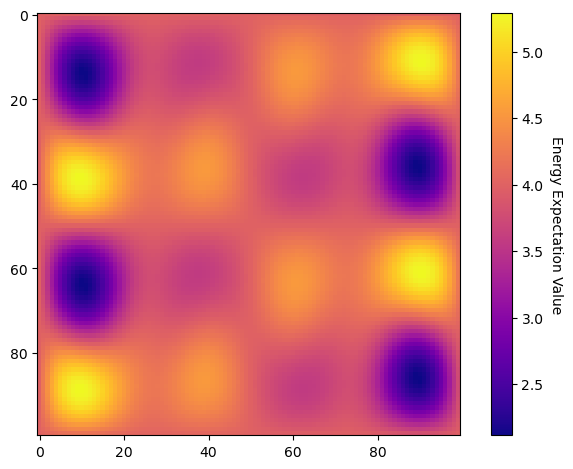

State  100110  Probability:  9.0 %  Energy:  7.0
State  011001  Probability:  9.0 %  Energy:  7.0
State  101100  Probability:  5.55 %  Energy:  6.0
State  010011  Probability:  5.55 %  Energy:  6.0
State  001001  Probability:  3.9 %  Energy:  6.0
State  110110  Probability:  3.9 %  Energy:  6.0
State  100100  Probability:  3.39 %  Energy:  6.0
State  011011  Probability:  3.39 %  Energy:  6.0
State  010110  Probability:  2.92 %  Energy:  5.0
State  101001  Probability:  2.92 %  Energy:  5.0
State  110010  Probability:  2.92 %  Energy:  5.0
State  001101  Probability:  2.92 %  Energy:  5.0


In [24]:
size = 100
#-------------------------------------------------------
Vert = [ 0,1,2,3,4,5 ]
Edge = [ [0,1],[0,2],[0,5],[1,2],[1,3],[2,3],[2,4],[3,5] ]
#-------------------------------------------------------
Energies,States = oq.MaxCut_Energy( Vert,Edge )
EV_grid = np.zeros(shape=(size,size))
EV_max = -1
#========================================================
for b in np.arange(size):
    beta = round(2*m.pi*(b/size),4)
    for g in np.arange(size):
        gamma = round(2*m.pi*(g/size),4)
        q = QuantumRegister(len(Vert))
        qc= QuantumCircuit(q)
        for hh in np.arange(len(Vert)):
            qc.h( q[int(hh)] )
        oq.MaxCut_Circuit( qc, q, Vert, Edge, beta, gamma )
        EV = oq.E_Expectation_Value( qc, Energies )
        EV_grid[b,g] = EV
        if( EV > EV_max ):
            Params = [beta,gamma]
            EV_max = EV
print('Energy Expectation Value: ',EV_max,' \u03B3 = ',Params[1],' \u03B2 = ',Params[0],'\n')
#--------------------------------------
fig, ax = plt.subplots()
show_text = False
show_ticks = False
oq.Heatmap(EV_grid, show_text, show_ticks, ax, "plasma", "Energy Expectation Value")
fig.tight_layout()
plt.show()
#======================================
beta = Params[0]
gamma = Params[1]
#--------------------------------------
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
oq.MaxCut_Circuit( qc, q, Vert, Edge, beta, gamma )
SV = oq.execute( qc, S_simulator, shots=1 ).result().get_statevector()
oq.Top_States(States,Energies,SV,12)